## Proceso de ML

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker # para visualización de intervalos
import seaborn as sns

### 1. Obtención de datos

In [2]:
casas = pd.read_csv("USA_Housing.csv") #creo el DataFrame

In [3]:
casas.head(5) # muestro los 5ros elementos por defecto 

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
#información general de la data
casas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
casas.describe() 

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


C:\Users\Paulina Males\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

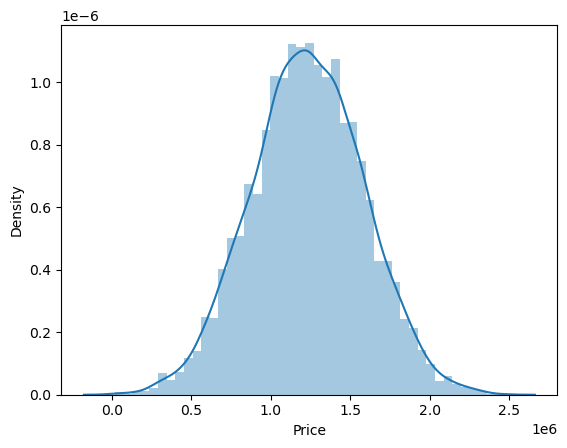

In [6]:
"""El precio medio es 1.232073, el maximo 2,5 y el minimo en 1,6
la curva corresponde a distribucion normal--> La distribución tiene la forma de una campana
y la mayor parte del área de esta campana se encuentra donde la media (mediana y moda).
El área debajo de la campana es de 1, y se divide por 0.5 a la izquierda y 0.5 a la derecha de la media."""
sns.distplot(casas['Price'])

### 2. Limpieza de datos


<AxesSubplot:>

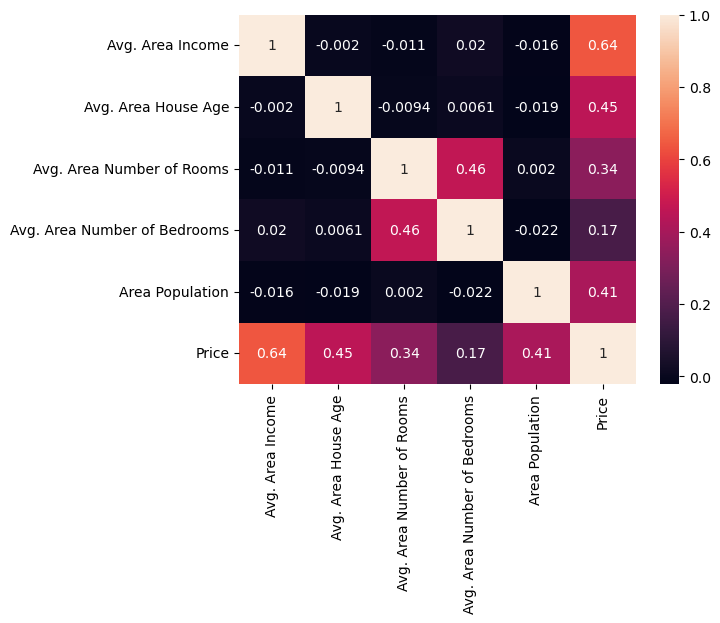

In [7]:
""" Veo la correlacion entre las columnas lo que mas influye en el precio es 0,64
se toma en cuenta el minimo, maximo """
sns.heatmap(casas.corr(), annot=True)

In [8]:
# Dimensiones del dataset
casas.shape
#cantidad de datos (filas x columnas)

(5000, 7)

In [9]:
# Número de datos ausentes por variable
"""La mayoría de algoritmos no aceptan observaciones incompletas o bien se 
ven muy influenciados por ellas. Su identificación se tiene que realizar / eliminar
antes de separar los datos para asegurar que se establecen todas las 
estrategias de imputación necesarias."""
casas.isna().sum().sort_values()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [10]:
# como parte de la limpieza de datos es modificarlos de modo q se pueda acceder a ellos
casas.columns 

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [11]:
# Valores observados de Bedrooms
casas.Avg. Area Number of Bedrooms.value_counts() 
"""no es posible necesito renombrar"""

SyntaxError: invalid syntax (1525197264.py, line 2)

In [12]:
casas=casas.rename(columns={'Avg. Area Income':'Income', 'Avg. Area House Age':'HouseAge', 'Avg. Area Number of Rooms':'Rooms',
       'Avg. Area Number of Bedrooms':'Bedrooms', 'Area Population':'Population'})
casas.Bedrooms.value_counts() 

4.38    46
3.17    41
3.40    40
3.16    39
3.22    38
        ..
6.31     7
6.01     6
6.02     6
5.42     6
6.42     5
Name: Bedrooms, Length: 255, dtype: int64

In [13]:
# Se convierte la variable Bedrooms tipo string
"""luego realizar un modelo que incluya este dato"""
casas.Bedrooms = casas.Bedrooms.astype("str")
casas.Bedrooms

0       4.09
1       3.09
2       5.13
3       3.26
4       4.23
        ... 
4995    3.46
4996    4.02
4997    2.13
4998    5.44
4999    4.07
Name: Bedrooms, Length: 5000, dtype: object

In [14]:
# se muestran datos solo del tipo especificado (solo consulta,no se modifican)
casas.select_dtypes(include=['float64', 'int']).describe()

,Income,HouseAge,Rooms,Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,69621.713378,2.469066e+06


In [15]:
# Variables cualitativas (tipo object)
casas.select_dtypes(include=['object']).describe()

,Bedrooms,Address
count,5000,5000
unique,255,5000
top,4.38,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
freq,46,1


### 3. Divido los datos en entrenamiento y prueba.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import minmax_scale

In [17]:
casas.head(3)

,Income,HouseAge,Rooms,Bedrooms,Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."


In [18]:
# paso los datos de Bedrooms al final
cols = [col for col in casas if col != casas.columns[-4]] + [casas.columns[-4]] 
casas = casas[cols]
casas.head(3)

,Income,HouseAge,Rooms,Population,Price,Address,Bedrooms
0,79545.458574,5.682861,7.009188,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",4.09
1,79248.642455,6.002900,6.730821,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA...",3.09
2,61287.067179,5.865890,8.512727,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",5.13


In [19]:
# los datos se dejaron como estaban (no hubo limpieza)
# Pero, acomodar la data tambien es una opcion


In [20]:
"""# Variables numéricas"""
# la idea es estimar el precio a futuro 
# casas.select_dtypes(include=['float64', 'int']).describe()
x = casas.iloc[:, :-3] # tomo las caracteristicas ..todas las columnas q no son precios
x

,Income,HouseAge,Rooms,Population
0,79545.458574,5.682861,7.009188,23086.800503
1,79248.642455,6.002900,6.730821,40173.072174
2,61287.067179,5.865890,8.512727,36882.159400
3,63345.240046,7.188236,5.586729,34310.242831
4,59982.197226,5.040555,7.839388,26354.109472
...,...,...,...,...
4995,60567.944140,7.830362,6.137356,22837.361035
4996,78491.275435,6.999135,6.576763,25616.115489
4997,63390.686886,7.250591,4.805081,33266.145490
4998,68001.331235,5.534388,7.130144,42625.620156


In [21]:
"""Cuando se crea un modelo, es muy importante estudiar la distribución de la variable
respuesta, ya que, a fin de cuentas, es lo que interesa predecir. """
#y = casas.iloc[:, -1:]# columna / variable objetivo
y = casas['Price']
y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

In [35]:
# entremiento 70 - 30%.. aleatoreamente
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=42)

### 4. Creo y entreno el modelo

In [23]:
# Transformaciones para las variables numéricas
# PROBAR con y sin esto transformación
#x_train = minmax_scale(x_train)
#y_train = minmax_scale(y_train)

In [36]:
lrm = LinearRegression() # algoritmo a utilizar
lrm.fit(x_train,y_train) #

LinearRegression()

### 5. Modelo de pruebas (evalua el modelo)

In [25]:
from sklearn import metrics

In [26]:
"""
x_test tiene el precio real de las casas con el que podemos comparar
--> predicciones 1308536.1359262  vs y_test 1.339096e+06 la diferencia es de 0.3
este seria el error """
y_pred = lrm.predict(x_test)
y_pred

array([1309493.18905064, 1238962.66595446, 1248121.55598692, ...,
       1459381.97704702, 1482240.08207933, 1050989.28892325])

'SI se traza una linea diagonal vemos que practicamente pasaria \npor la mitad, lo que indica que los datos de prediccion y reales se parecen\nlos datos que estan cerca a la diagonal quiere decir q el modelo es bueno'

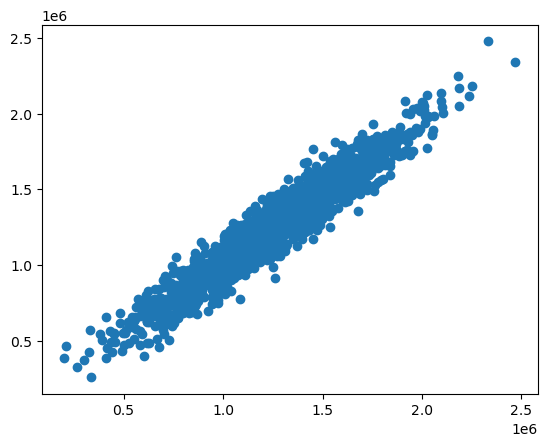

In [27]:
plt.scatter(y_test, y_pred)
"""SI se traza una linea diagonal vemos que practicamente pasaria 
por la mitad, lo que indica que los datos de prediccion y reales se parecen
los datos que estan cerca a la diagonal quiere decir q el modelo es bueno"""

C:\Users\Paulina Males\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

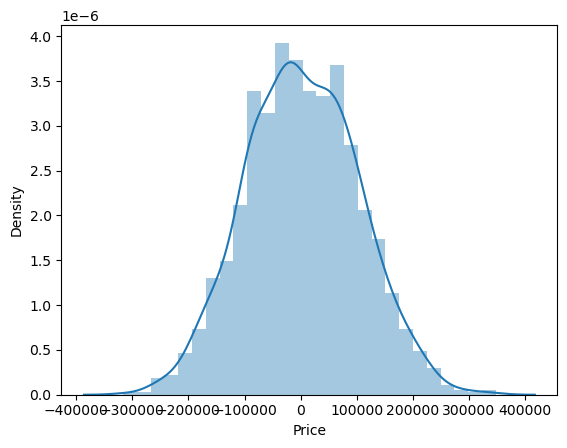

In [37]:
"""restamos el precio real de la prediccion, el cual es el error (valor recidual)
si no tuviera un modelo de distribucionon normal deberiamos replantear el modelo"""
sns.distplot(y_test - y_pred)

In [38]:
# calculamos el coeficiente de determinación R2
"""El rango de R2 está entre 0 y 1, siendo 1 lo mejor."""
print("Coeficiente de determinación R^2:", lrm.score(x_train,y_train))

Coeficiente de determinación R^2: 0.9192473429726608


In [39]:
print("Coeficiente de determinación R^2:", lrm.score(x_test,y_pred))

Coeficiente de determinación R^2: 1.0


In [31]:
# MAE (Mean absolute error) - Error medio absoluto
metrics.mean_absolute_error(y_test,y_pred) # paso los valores reales y predicciones
# mientras menor es el valor mejor es el modelo

81116.43361053693

In [32]:
# MSE (Error cuadrático medio)
metrics.mean_squared_error(y_test,y_pred)

10062092569.298563

In [33]:
# RMSE (Raíz Cuadrada del MSE)
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

100309.98240104802

In [34]:
# Se crea un dataframe con las predicciones y el valor real
from math import *
df_predicciones = pd.DataFrame({'precio' : y_test, 'prediccion' : y_pred, 'dif' : abs((y_test-y_pred))})
df_predicciones.head()

,precio,prediccion,dif
1501,1.339096e+06,1.309493e+06,29602.888194
2586,1.251794e+06,1.238963e+06,12831.512882
2653,1.340095e+06,1.248122e+06,91973.410219
1055,1.431508e+06,1.229777e+06,201730.721718
705,1.042374e+06,1.062161e+06,19787.404977


In [ ]:
# Conclusion el modelo es un bastante bueno asi que puede se utilizado como modelo defnitivo